In [1]:
# activate cvenv as kernel

In [2]:
# if you are outside of the package you would run: "import ProjectDatasets.CZIDataset"
import czi
import matplotlib.pyplot as plt
import skimage
import numpy as np

In [3]:
skimage.__version__

'0.22.0'

In [4]:
folder = "/mnt/datadisk/FactinProcessed"

In [5]:
dataset = czi.CZIDataset(folder=folder,twod_vid_channel=0)
MIP_video, shape, dims = dataset[2]
print(MIP_video.shape)

(2, 2048, 475)


In [6]:
def display_video(video, cmap = 'gray', cell_idx=None, num_frames_to_display=3, num_cols=3):
    
    # Calculate number of rows needed
    num_rows = (num_frames_to_display + num_cols - 1) // num_cols  
    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    axes = axes.flatten()

    # Loop through the first few frames
    for i in range(min(num_frames_to_display, len(video))):
        ax = axes[i]
        if (cell_idx != None and type(cell_idx) == int):
            ax.imshow(video[i][cell_idx], cmap=cmap)  # Use cmap='gray' for grayscale images
            ax.set_title(f'Frame {i}')
            ax.axis('off')  # Hide axes
        else: 
            ax.imshow(video[i], cmap=cmap)  # Use cmap='gray' for grayscale images
            ax.set_title(f'Frame {i}')
            ax.axis('off')  # Hide axes

    # Turn off unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [8]:
video_normalized = czi.Transforms2D.clip_intensities(MIP_video)
video_threshed = czi.Transforms2D.video_otsu_thresholding_parallel(video_normalized)
video_connected_components = czi.Transforms2D.video_connected_components_parallel(video_threshed)
video_bboxes = czi.Transforms2D.video_bounding_boxes_parallel(video_connected_components)
boxes_video = czi.Transforms2D.apply_bounding_boxes(MIP_video[0], video_bboxes[0][0])
display_video(video_connected_components,cmap="magma")

ValueError: autodetected range of [nan, nan] is not finite

NameError: name 'video_slices' is not defined

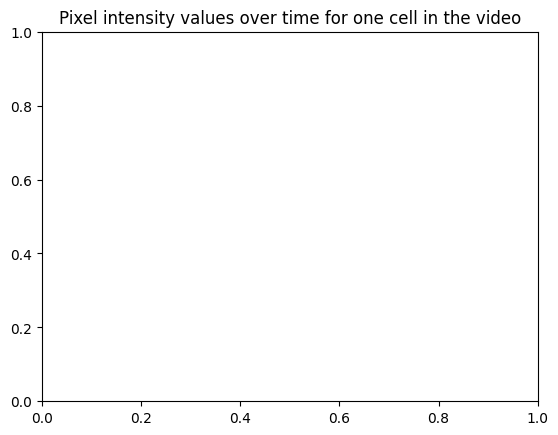

In [ ]:
plt.figure()
plt.title("Pixel intensity values over time for one cell in the video")
plt.plot(range(len(video_slices)), [np.mean(frame_bound_box[0]) for frame_bound_box in video_slices])
plt.xlabel("frame")
plt.ylabel("intensity over time")